In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from google.colab import drive


In [ ]:


drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_Cab_Data=pd.read_csv('/content/drive/MyDrive/DataSets/Cab_Data1.csv')
df_City=pd.read_csv('/content/drive/MyDrive/DataSets/City.csv')
df_Customer_ID=pd.read_csv('/content/drive/MyDrive/DataSets/Customer_ID.csv')
df_Transaction_ID=pd.read_csv('/content/drive/MyDrive/DataSets/Transaction_ID.csv')

In [ ]:
df_Cab_Data.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [ ]:
df_Cab_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [ ]:
df_Cab_Data['Profit']=df_Cab_Data['Price Charged']-df_Cab_Data['Cost of Trip']

In [ ]:
df_Cab_Data['Average_Profit_per_km']=df_Cab_Data['Profit']/df_Cab_Data['KM Travelled']

In [ ]:
df_Cab_Data.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Average_Profit_per_km
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,1.882266
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,0.826904
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,3.049558
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,0.777751
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,1.929439


In [ ]:
df_Cab_Data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Profit,Average_Profit_per_km
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,137.253198,6.083579
std,1.268058e+05,12.233526,274.378911,157.993661,160.311840,5.543493
min,1.000001e+07,1.900000,15.600000,19.000000,-220.060000,-4.998235
25%,1.011081e+07,12.000000,206.437500,151.200000,28.012000,2.000385
50%,1.022104e+07,22.440000,386.360000,282.480000,81.962000,4.466809
75%,1.033094e+07,32.960000,583.660000,413.683200,190.030000,9.170006
max,1.044011e+07,48.000000,2048.030000,691.200000,1463.966000,41.115556


In [ ]:
df_Cab_Data['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [ ]:
df_Cab_Data['Company'].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

Text(0, 0.5, 'Number of cabs')

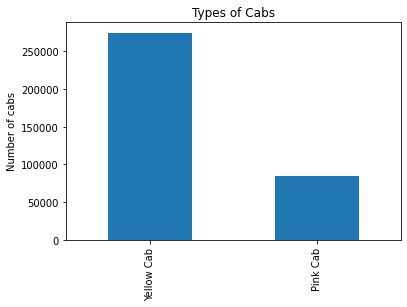

In [ ]:
fig = df_Cab_Data['Company'].value_counts().plot.bar()
fig.set_title('Types of Cabs')
fig.set_ylabel('Number of cabs')

In [ ]:
df_Cab_Data['Company'].value_counts(normalize=True)

Yellow Cab    0.764294
Pink Cab      0.235706
Name: Company, dtype: float64

In [ ]:
Pink_cab_df=df_Cab_Data.loc[df_Cab_Data.Company.str.contains('Pink Cab')]

In [ ]:
Pink_cab_df.head(1)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Average_Profit_per_km
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,1.882266


In [ ]:
sum (Pink_cab_df['Average_Profit_per_km'])

234641.65120829002

In [ ]:
sum (Pink_cab_df['KM Travelled'])

1911073.1099999654

In [ ]:
Pink_cab_df['City'].unique() 

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

Text(0, 0.5, 'Number of customers')

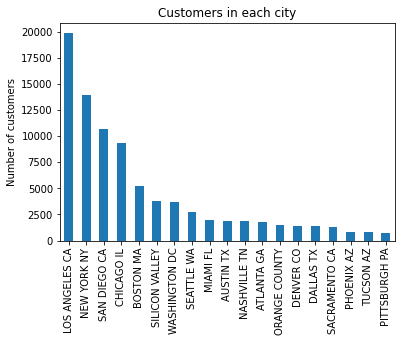

In [ ]:
fig = Pink_cab_df['City'].value_counts().plot.bar()
fig.set_title('Customers in each city')
fig.set_ylabel('Number of customers')

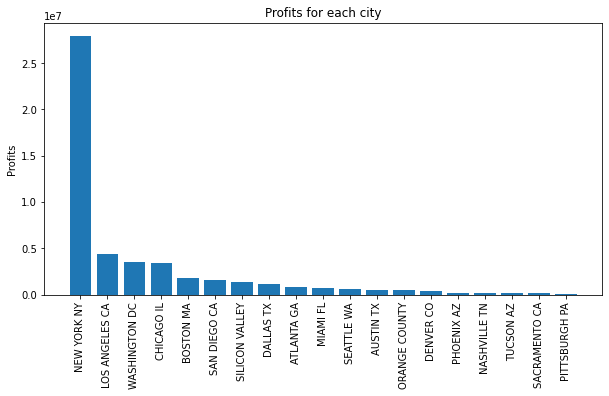

                   Profits
City                      
NEW YORK NY     27962555.0
LOS ANGELES CA   4411709.0
WASHINGTON DC    3492870.0
CHICAGO IL       3387313.0
BOSTON MA        1768719.0
SAN DIEGO CA     1587163.0
SILICON VALLEY   1316705.0
DALLAS TX        1128733.0
ATLANTA GA        842433.0
MIAMI FL          758301.0
SEATTLE WA        604685.0
AUSTIN TX         526701.0
ORANGE COUNTY     457002.0
DENVER CO         397585.0
PHOENIX AZ        192941.0
NASHVILLE TN      149532.0
TUCSON AZ         140261.0
SACRAMENTO CA     117326.0
PITTSBURGH PA      85166.0


In [ ]:
import numpy as np
def profit():
        price = np.array(df_Cab_Data["Price Charged"])
        cost = np.array(df_Cab_Data["Cost of Trip"])
        profit = np.subtract(price,cost)
        new = zip(df_Cab_Data["City"],profit)
        profit_df = (pd.DataFrame(new,columns = ["City","Profits"]).groupby("City").sum()).sort_values(by = "Profits",ascending=False)
        new_df = profit_df.round()
        
        #visualization
        plt.figure(figsize = (10,5))
        plt.bar(new_df.index,new_df.Profits)
        plt.xticks(rotation="90")
        plt.ylabel("Profits")
        plt.title("Profits for each city")
        plt.show()
        
        print(new_df)

profit()

In [ ]:
df_Cab_Data['year'] = pd.DatetimeIndex(df_Cab_Data['Date of Travel']).year
df_Cab_Data['year']

0         2016
1         2016
2         2016
3         2016
4         2016
          ... 
359387    2018
359388    2018
359389    2018
359390    2018
359391    2018
Name: year, Length: 359392, dtype: int64

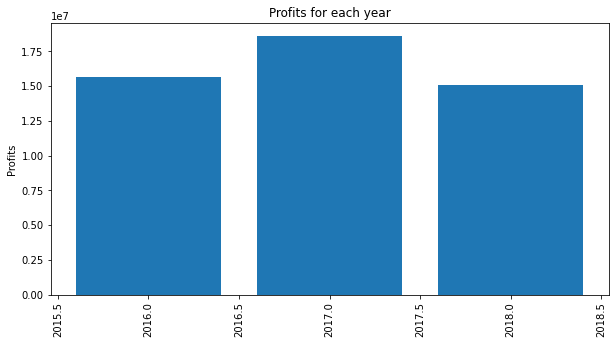

         Profits
year            
2018  15077562.0
2017  18609633.0
2016  15640507.0


In [ ]:
import numpy as np
def profit_year():
        price = np.array(df_Cab_Data["Price Charged"])
        cost = np.array(df_Cab_Data["Cost of Trip"])
        profit = np.subtract(price,cost)

        new = zip(df_Cab_Data["year"],profit,df_Cab_Data["Company"])
        profit_df = (pd.DataFrame(new,columns = ["year","Profits","Company"]).groupby("year").sum()).sort_values(by = "year",ascending=False)
        new_df = profit_df.round()
        
        #visualization
        plt.figure(figsize = (10,5))
        plt.bar(new_df.index,new_df.Profits)
        plt.xticks(rotation="90")
        plt.ylabel("Profits")
        plt.title("Profits for each year")
        plt.show()
        
        print(new_df)

profit_year()

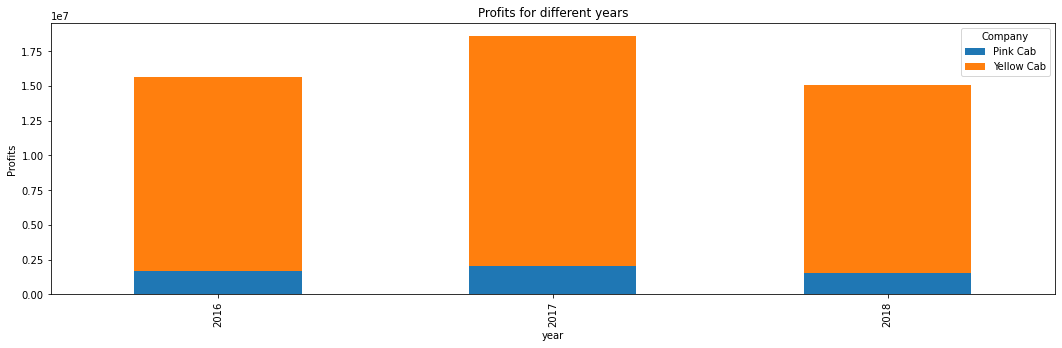

In [ ]:
fig=df_Cab_Data.groupby(['year','Company']).sum().unstack().plot(kind='bar',y='Profit', stacked=True,figsize=(18,5))
fig.set_title('Profits for different years')
fig.set_ylabel('Profits')
result=df_Cab_Data.groupby(['year','Company']).sum()


Text(0, 0.5, 'Profits')

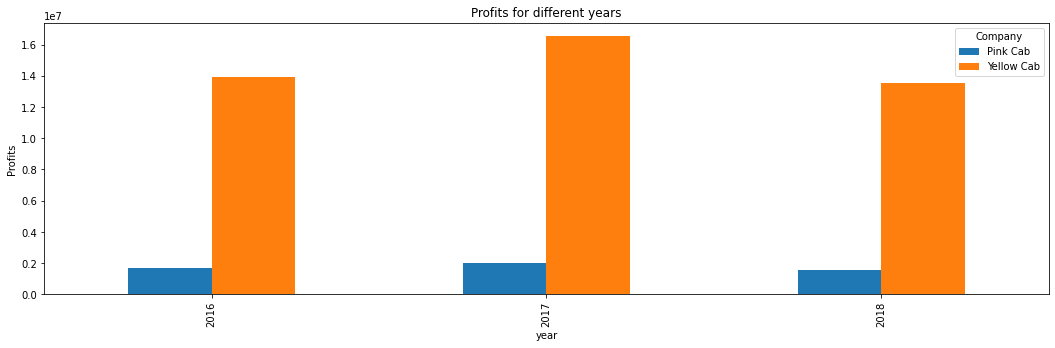

In [ ]:
fig=df_Cab_Data.groupby(['year','Company']).sum().unstack().plot(kind='bar',y='Profit', stacked=False,figsize=(18,5))
fig.set_title('Profits for different years')
fig.set_ylabel('Profits')

Text(0, 0.5, 'Profits')

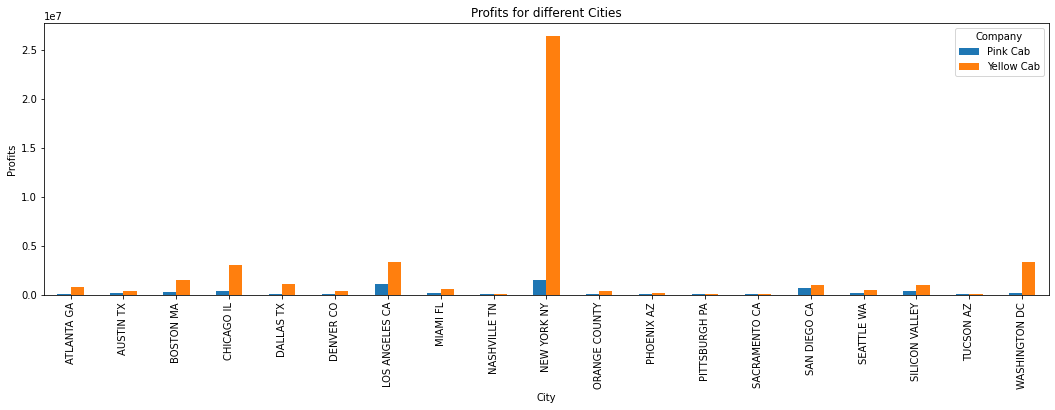

In [ ]:
fig=df_Cab_Data.groupby(['City','Company']).sum().unstack().plot(kind='bar',y='Profit', stacked=False,figsize=(18,5))
fig.set_title('Profits for different Cities')
fig.set_ylabel('Profits')

Text(0, 0.5, 'Profits')

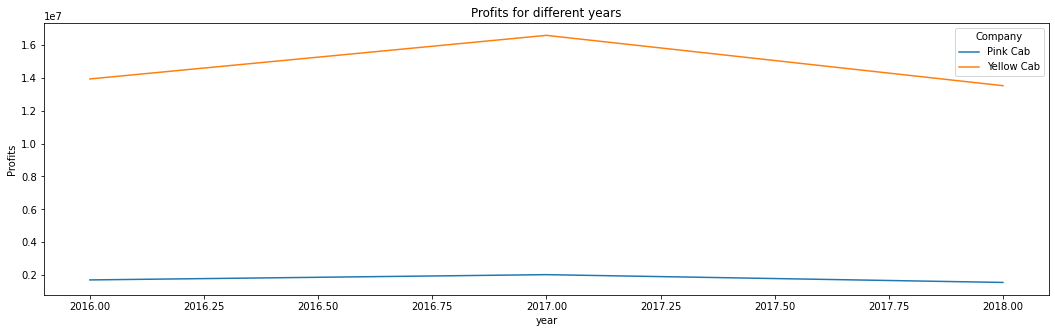

In [ ]:
fig=df_Cab_Data.groupby(['year','Company']).sum().unstack().plot(kind='line',y='Profit', stacked=False,figsize=(18,5))
fig.set_title('Profits for different years')
fig.set_ylabel('Profits')

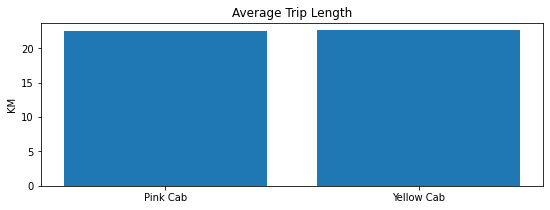

            KM Travelled
Company                 
Pink Cab       22.559917
Yellow Cab     22.569517


In [ ]:
def com_km():
    new = df_Cab_Data[["Company", "KM Travelled"]]
    new_df = (new.groupby("Company").mean()).sort_values(by="KM Travelled")
    
    #visualization
    plt.figure(figsize = (9,3))
    plt.bar(new_df.index,new_df["KM Travelled"])
    plt.ylabel("KM")
    plt.title("Average Trip Length")
    plt.show()
        
    print(new_df)

com_km()

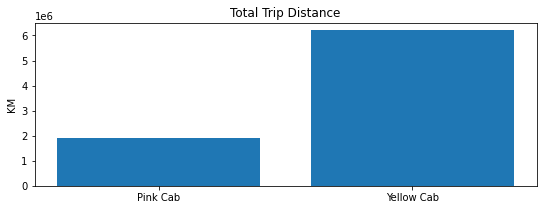

            KM Travelled
Company                 
Pink Cab      1911073.11
Yellow Cab    6199417.47


In [ ]:
def com_km():
    new = df_Cab_Data[["Company", "KM Travelled"]]
    new_df = (new.groupby("Company").sum()).sort_values(by="KM Travelled")
    
    #visualization
    plt.figure(figsize = (9,3))
    plt.bar(new_df.index,new_df["KM Travelled"])
    plt.ylabel("KM")
    plt.title("Total Trip Distance")
    plt.show()
        
    print(new_df)

com_km()

In [ ]:
len(Pink_cab_df['City'].unique())

19

In [ ]:
Pink_cab_City_Profit_df=Pink_cab_df.loc[Pink_cab_df.City.str.contains('ATLANTA GA'), ['City', 'Profit']]
    

In [ ]:
sum(Pink_cab_City_Profit_df['Profit'])

96050.07600000023

In [ ]:

for i in range (0, len(Pink_cab_df['City'].unique())):
   print(int(sum(Pink_cab_df.loc[Pink_cab_df.City.str.contains(Pink_cab_df['City'].unique()[i]), ['City', 'Profit']]['Profit'])))

96050
147445
262001
318722
24730
40584
1125732
162301
64284
1511474
101995
35596
17107
55324
637889
112781
340250
59289
193766


In [ ]:
profit_list=[96050,
             147445,
262001,
318722,
24730,
40584,
1125732,
162301,
64284,
1511474,
101995,
35596,
17107,
55324,
637889,
112781,
340250,
59289,
193766
]

In [ ]:
max(profit_list) 

1511474

In [ ]:
min(profit_list)

17107

In [ ]:
Pink_cab_df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Profit,Average_Profit_per_km
count,8.471100e+04,84711.000000,84711.000000,84711.000000,84711.000000,84711.000000
mean,1.022394e+07,22.559917,310.800856,248.148682,62.652174,2.769908
std,1.261782e+05,12.231092,181.995661,135.403345,77.590378,2.697212
min,1.000001e+07,1.900000,15.600000,19.000000,-220.060000,-4.912054
25%,1.011014e+07,12.000000,159.970000,131.868000,11.206000,0.891572
50%,1.022590e+07,22.440000,298.060000,246.330000,41.500000,2.423598
75%,1.033642e+07,32.960000,441.505000,360.180000,93.965000,4.281847
max,1.043762e+07,48.000000,1623.480000,576.000000,1119.480000,28.646939


In [ ]:
import datetime

In [ ]:
Pink_cab_df['Date of Travel']

0         08-01-2016
1         06-01-2016
2         02-01-2016
3         07-01-2016
4         03-01-2016
             ...    
357449    06-01-2018
357450    31-12-2018
357451    07-01-2018
357452    02-01-2018
357453    05-01-2018
Name: Date of Travel, Length: 84711, dtype: object

In [ ]:
pd.to_datetime(Pink_cab_df['Date of Travel'])

0        2016-08-01
1        2016-06-01
2        2016-02-01
3        2016-07-01
4        2016-03-01
            ...    
357449   2018-06-01
357450   2018-12-31
357451   2018-07-01
357452   2018-02-01
357453   2018-05-01
Name: Date of Travel, Length: 84711, dtype: datetime64[ns]

In [ ]:
df_City.head(1)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"


In [ ]:
df_Customer_ID.head(1)


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813


Text(17.200000000000017, 0.5, 'Percentage of customers')

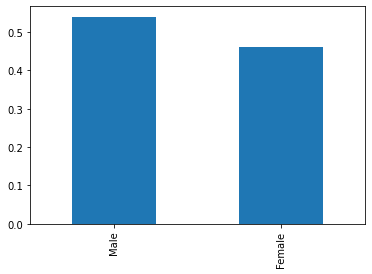

In [ ]:
df_Customer_ID['Gender'].value_counts(normalize=True).plot.bar()
fig.set_title('Sex of customers')
fig.set_ylabel('Percentage of customers')

Text(0, 0.5, 'Mean Income (USD/Month)')

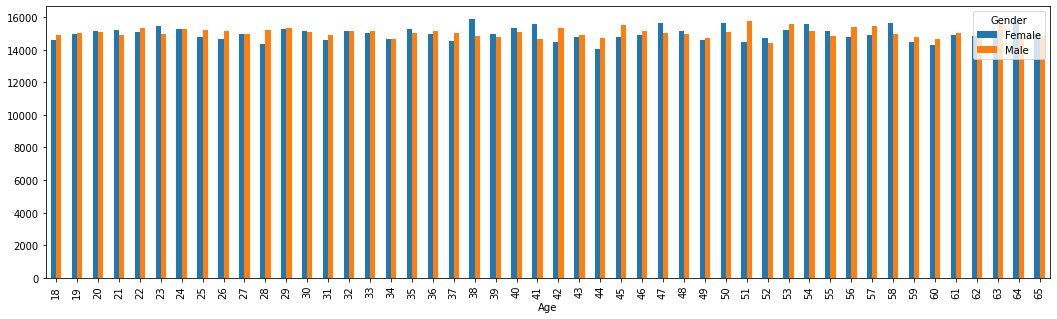

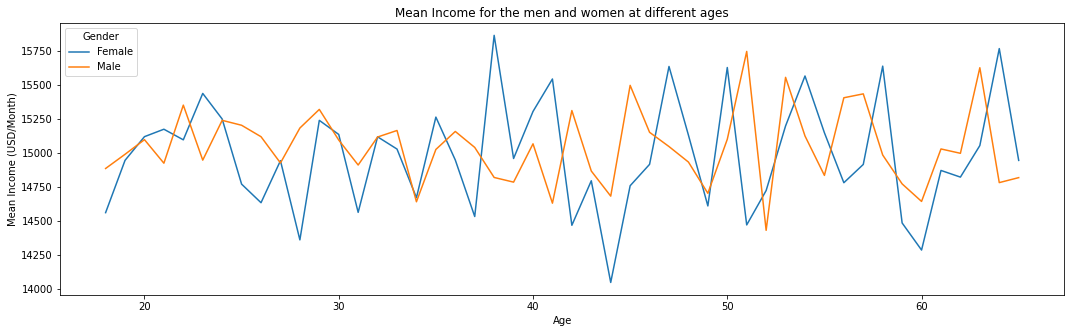

In [ ]:
fig=df_Customer_ID.groupby(['Age','Gender']).mean().unstack().plot(kind='bar',y='Income (USD/Month)', stacked=False,figsize=(18,5))
fig=df_Customer_ID.groupby(['Age','Gender']).mean().unstack().plot(kind='line',y='Income (USD/Month)', stacked=False,figsize=(18,5))
fig.set_title('Mean Income for the men and women at different ages')
fig.set_ylabel('Mean Income (USD/Month)')

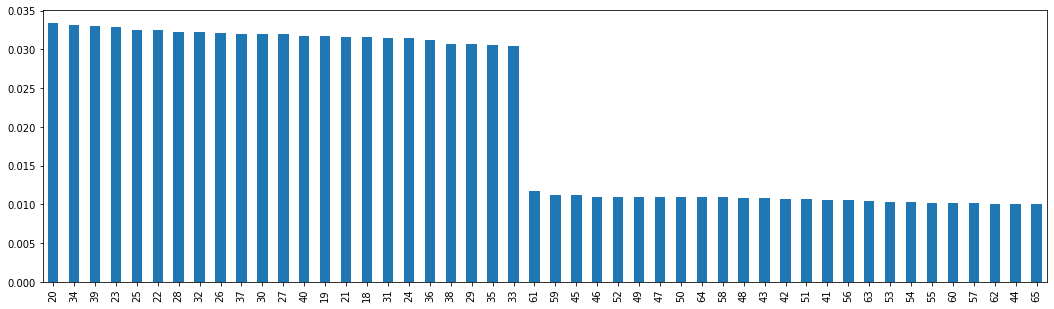

In [ ]:
df_Customer_ID['Age'].value_counts(normalize=True).plot.bar(df_Customer_ID['Age'].index, figsize=(18,5))


In [ ]:
df_Transaction_ID.head(1)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card


In [ ]:
df_Cab_Data['Transaction ID'].is_unique

True

In [ ]:
df_Transaction_ID['Transaction ID'].is_unique

True

In [ ]:
len(df_Cab_Data['Transaction ID'])

359392

In [ ]:
len(df_Transaction_ID['Transaction ID'])

440098

In [ ]:
len(df_Transaction_ID['Transaction ID'].unique())

440098

In [ ]:
df_Transaction_ID['Payment_Mode'].unique

<bound method Series.unique of 0         Card
1         Card
2         Cash
3         Cash
4         Card
          ... 
440093    Cash
440094    Cash
440095    Card
440096    Card
440097    Card
Name: Payment_Mode, Length: 440098, dtype: object>

Text(0, 0.5, 'Number of payments')

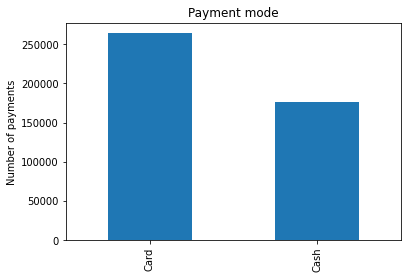

In [ ]:
fig = df_Transaction_ID['Payment_Mode'].value_counts().plot.bar()
fig.set_title('Payment mode')
fig.set_ylabel('Number of payments')

In [ ]:
df_Transaction_ID['Payment_Mode'].value_counts()

Card    263991
Cash    176107
Name: Payment_Mode, dtype: int64

In [ ]:
df_Cab_Data['Transaction ID'].isin(df_Transaction_ID['Transaction ID']).value_counts()

True    359392
Name: Transaction ID, dtype: int64

In [ ]:
df_Transaction_ID[['Transaction ID', 'Payment_Mode']]

,Transaction ID,Payment_Mode
0,10000011,Card
1,10000012,Card
2,10000013,Cash
3,10000014,Cash
4,10000015,Card
...,...,...
440093,10440104,Cash
440094,10440105,Cash
440095,10440106,Card
440096,10440107,Card


In [ ]:
df = pd.merge(df_Cab_Data, df_Transaction_ID, on="Transaction ID")
df_1=pd.merge(df_Customer_ID, df, on="Customer ID")

In [ ]:
df_1.head(5)

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Average_Profit_per_km,year,Payment_Mode
0,29290,Male,28,10813,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,1.882266,2016,Card
1,29290,Male,28,10813,10351127,21-07-2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,10.739870,2018,Cash
2,29290,Male,28,10813,10412921,23-11-2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,4.574571,2018,Card
3,27703,Male,27,9237,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,0.826904,2016,Card
4,27703,Male,27,9237,10320494,21-04-2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,6.981330,2018,Card


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            359392 non-null  int64  
 1   Gender                 359392 non-null  object 
 2   Age                    359392 non-null  int64  
 3   Income (USD/Month)     359392 non-null  int64  
 4   Transaction ID         359392 non-null  int64  
 5   Date of Travel         359392 non-null  object 
 6   Company                359392 non-null  object 
 7   City                   359392 non-null  object 
 8   KM Travelled           359392 non-null  float64
 9   Price Charged          359392 non-null  float64
 10  Cost of Trip           359392 non-null  float64
 11  Profit                 359392 non-null  float64
 12  Average_Profit_per_km  359392 non-null  float64
 13  year                   359392 non-null  int64  
 14  Payment_Mode           359392 non-nu

Text(0, 0.5, 'Profits')

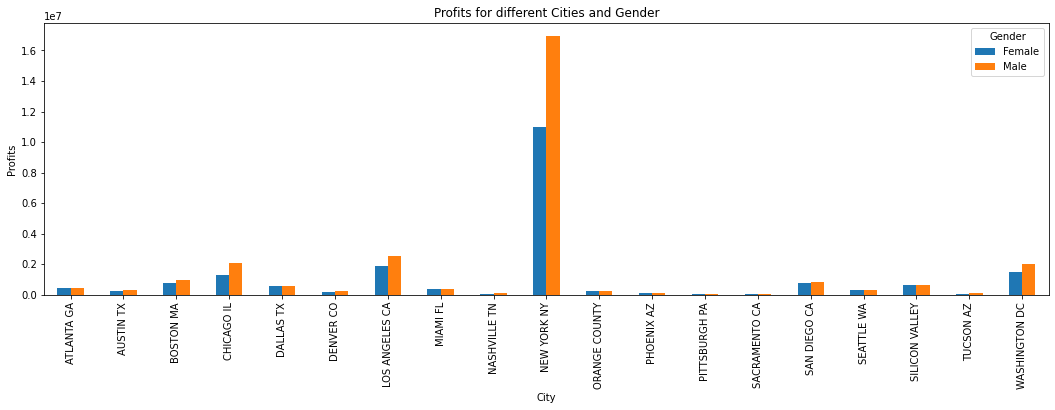

In [ ]:
fig=df_1.groupby(['City','Gender']).sum().unstack().plot(kind='bar',y='Profit', stacked=False,figsize=(18,5))
fig.set_title('Profits for different Cities and Gender')
fig.set_ylabel('Profits')



Text(0, 0.5, 'Profits')

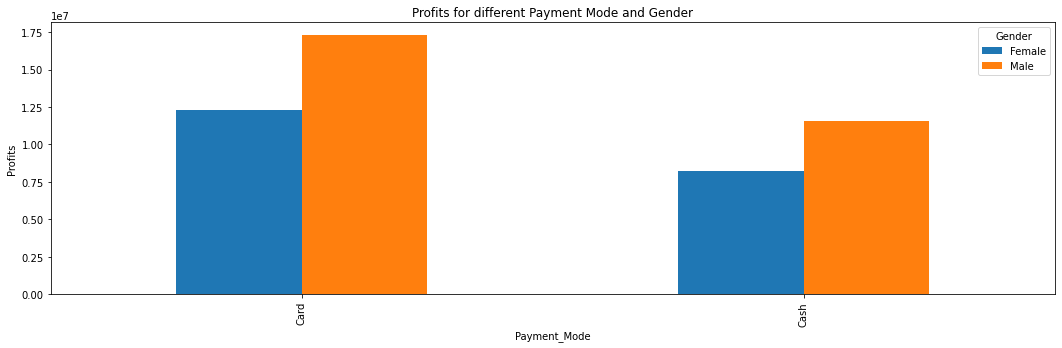

In [ ]:
fig=df_1.groupby(['Payment_Mode','Gender']).sum().unstack().plot(kind='bar',y='Profit', stacked=False,figsize=(18,5))
fig.set_title('Profits for different Payment Mode and Gender')
fig.set_ylabel('Profits')


Text(0, 0.5, 'Number of payments')

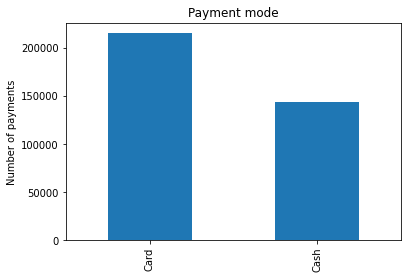

In [ ]:
fig = df_1['Payment_Mode'].value_counts().plot.bar()
fig.set_title('Payment mode')
fig.set_ylabel('Number of payments')

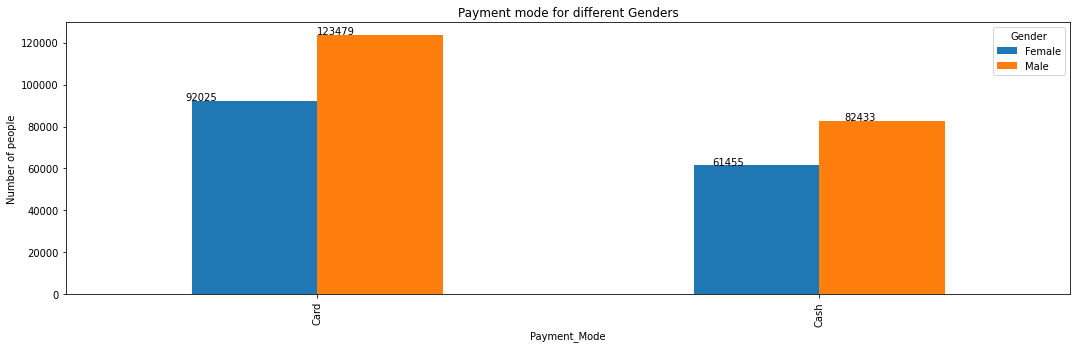

In [ ]:

fig=df_1.groupby(['Payment_Mode','Gender']).size().unstack().plot(kind='bar', stacked=False,figsize=(18,5))
fig.set_title('Payment mode for different Genders')
fig.set_ylabel('Number of people')
df_1.groupby(['Payment_Mode','Gender']).size()
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.005))

In [ ]:
df_1['Cost_per_distance']=(df_1['KM Travelled']/df['Price Charged'])
df_1.head(1)

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Average_Profit_per_km,year,Payment_Mode,Cost_per_distance
0,29290,Male,28,10813,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,1.882266,2016,Card,0.082087


Text(0, 0.5, 'Average cost per unit distance')

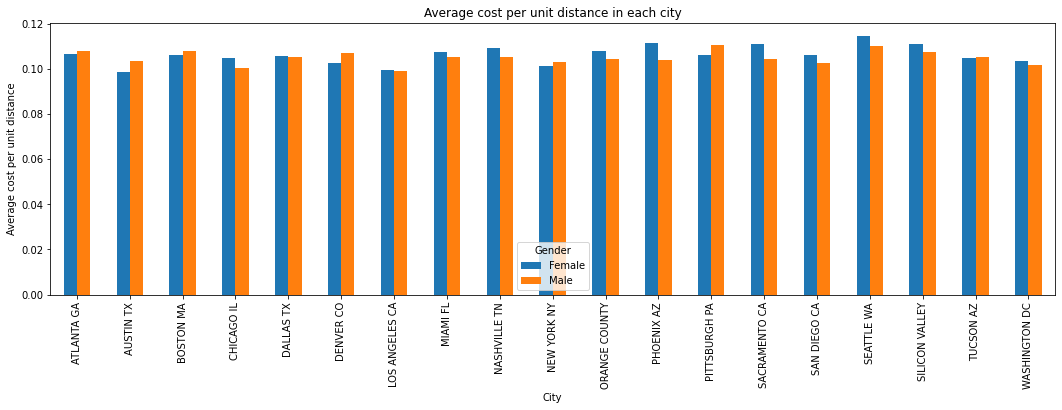

In [ ]:
fig=df_1.groupby(['City','Gender']).mean().unstack().plot(kind='bar',y='Cost_per_distance', stacked=False,figsize=(18,5))
fig.set_title('Average cost per unit distance in each city')
fig.set_ylabel('Average cost per unit distance')

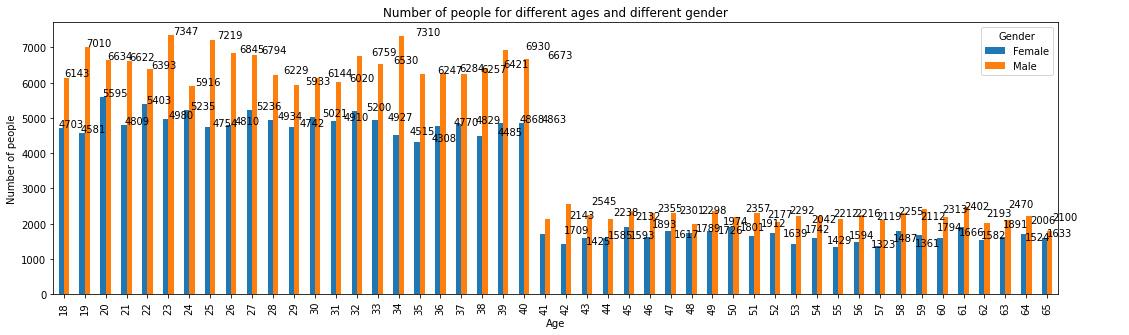

In [ ]:
fig=df_1.groupby(['Age','Gender']).size().unstack().plot(kind='bar', stacked=False,figsize=(18,5))
fig.set_title('Number of people for different ages and different gender')
fig.set_ylabel('Number of people')

for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.005))

Text(0, 0.5, 'Profit')

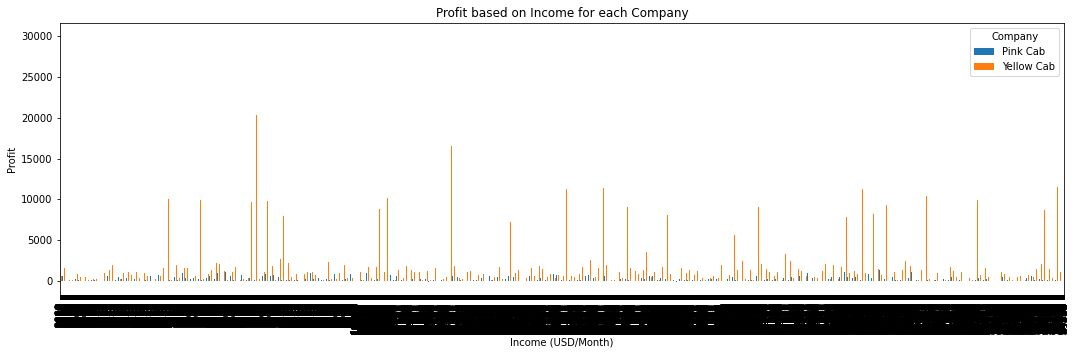

In [ ]:
fig=df_1.groupby(['Income (USD/Month)','Company']).sum().unstack().plot(kind='bar',y='Profit', stacked=False,figsize=(18,5))
fig.set_title('Profit based on Income for each Company')
fig.set_ylabel('Profit')

In [ ]:
bins = [0,2500, 15000, np.inf]
names = ['less than 2500', 'between 2500 and 15000', '15000+']

df_1['IncomeRange'] = pd.cut(df_1['Income (USD/Month)'], bins, labels=names)

In [ ]:
fig=pd.cut(df_1['Income (USD/Month)'], bins, labels=names).value_counts().plot.bar()
fig.set_ylabel('Number of people with Salary')
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.005))

NameError: ignored

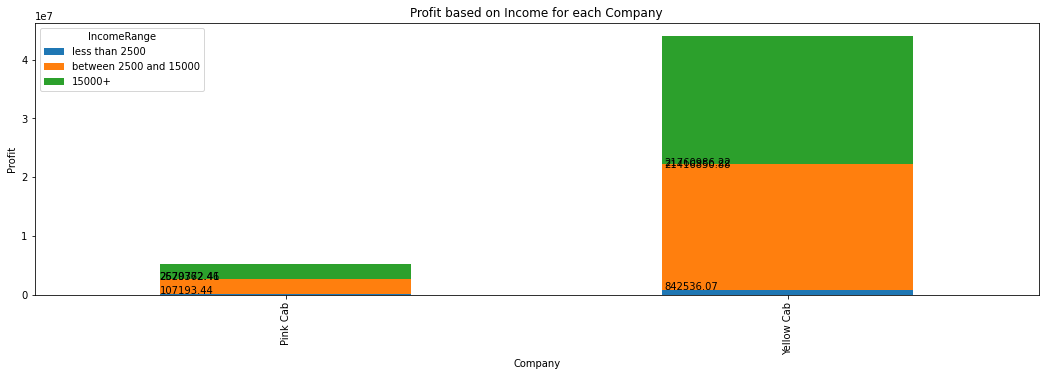

In [ ]:
fig=df_1.groupby(['Company','IncomeRange']).sum().unstack().plot(kind='bar',y='Profit', stacked=True,figsize=(18,5),align='center')
fig.set_title('Profit based on Income for each Company')
fig.set_ylabel('Profit')
for p in fig.patches:
  fig.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

In [ ]:
bins = [18,25,40,60, np.inf]
names = ['18-25','26-40','41-60', '61+']

df_1['AgeRange'] = pd.cut(df_1['Age'], bins, labels=names)

Text(0, 0.5, 'Profit')

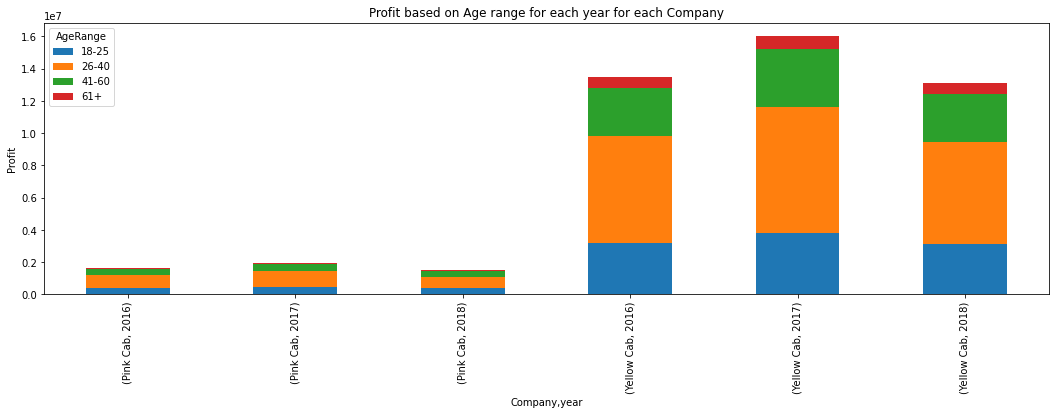

In [ ]:
fig=df_1.groupby(['Company','year','AgeRange']).sum().unstack().plot(kind='bar',y='Profit', stacked=True,figsize=(18,5),align='center')
fig.set_title('Profit based on Age range for each year for each Company')
fig.set_ylabel('Profit')
